In [6]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D,MaxPooling2D
from keras.models import Model
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

In [7]:
input_shape = (64,64,3)
X_input = Input(input_shape)
# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)
X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), name='max_pool')(X)
# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(1, activation='sigmoid', name='fc')(X)

# Create model. This creates our Keras model instance, you’ll use this 
model = Model(inputs = X_input, outputs = X, name='HappyModel')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
__________

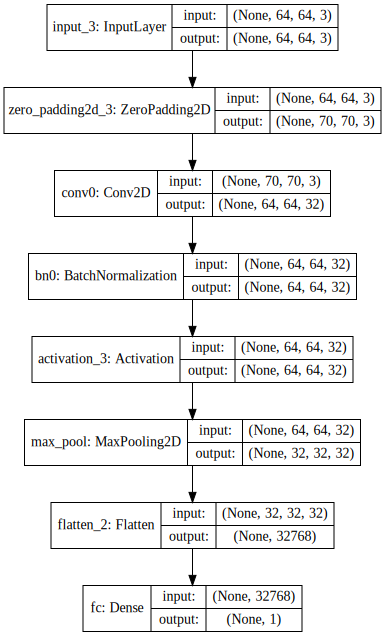

In [8]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
plot_model(model, to_file='MAXPOOLINGLAYER.png')